<a href="https://colab.research.google.com/github/okoweddk/Automated-Brain-Tumor-Detection-Using-Convolutional-Neural-Networks-with-EfficientNet-Architecture/blob/main/MachineLearningDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CHIKAMADU SOPHIA OKORO

OKO22608981

Data Link: https://www.kaggle.com/datasets/shreyag1103/brain-mri-scans-for-brain-tumor-classification





**Overview**

This Notebook provides a comprehensive approach to image classification using three different machine learning models: Support Vector Machines (SVM), Random Forest, and K-Nearest Neighbors (KNN) Here’s an overview of the workflow:
1. Data Preparation


Dataset Path Definition: The code begins by defining the dataset path where the images are stored.
Image Loading and Feature Extraction:
SVM & Random Forest: Images are loaded using a function load_images_from_folder, although the exact implementation of this function isn’t shown. These images are then split into training and testing sets.
KNN: The code extracts Histogram of Oriented Gradients (HOG) features from each image using the extract_hog_features function. The HOG features help in capturing the shape and structure information of objects in the images.
2. Label Encoding


The labels corresponding to each image are encoded into numerical values using LabelEncoder.
3. Data Splitting and Standardization


The data is split into training and testing sets using train_test_split.
SVM & Random Forest: Feature standardization is applied using StandardScaler to normalize the input features.
4. Model Training

SVM:
A GridSearchCV is utilized to perform hyperparameter tuning on SVM parameters like kernel type, regularization parameter (C), and gamma.
The best model is then used for predictions.
Random Forest:
The model is initialized with 100 trees and trained on the dataset.
KNN:
The model is trained with 5 neighbors on the HOG features extracted earlier.
5. Model Evaluation

Confusion Matrix:
For each model, the confusion matrix is computed and visualized using a heatmap, which provides insight into the number of correct and incorrect predictions.
Classification Report:
Precision, recall, F1-score, and support metrics are computed for each class using the classification_report.
Additional Metrics:
Metrics such as True Positive Rate (TPR), True Negative Rate (TNR), and F1 Score are computed from the confusion matrix.
ROC Curve:
Receiver Operating Characteristic (ROC) curves are plotted for each class to visualize the model’s performance in distinguishing between classes. This is done for both binary and multi-class classification scenarios.
6. Result Visualization

The performance metrics and confusion matrices are visualized using matplotlib and seaborn to give a clear understanding of how well each model is performing.

In [ ]:
!pip install scikit-image==0.19.3 # Replace 0.19.3 with the desired version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.14 requires scikit-image>=0.21.0, but you have scikit-image 0.19.3 which is incompatible.


Libraries and Functions

os:Provides a way of using operating system-dependent functionality such as reading or writing to the file system.

cv2 (OpenCV):A powerful library for computer vision tasks. It's used for image processing and manipulation.

Common functions include reading, writing, displaying images, and performing image transformations.

numpy (np):A fundamental package for scientific computing in Python.
Provides support for arrays, matrices, and many mathematical functions.

pandas (pd):A library for data manipulation and analysis.
Provides data structures like DataFrame, which is useful for handling structured data.

skimage.feature (graycomatrix, graycoprops):Part of the scikit-image library, which is used for image processing.

graycomatrix: Computes the gray-level co-occurrence matrix (GLCM), which is a statistical method of examining texture that considers the spatial relationship of pixels.

graycoprops: Extracts texture properties such as contrast, dissimilarity, homogeneity, energy, and correlation from the GLCM.

matplotlib.pyplot (plt):A plotting library used for creating static, animated, and interactive visualizations in Python.

sklearn.model_selection (train_test_split):A module from scikit-learn used for splitting data into training and testing sets.Helps in evaluating the performance of a machine learning model by training it on one subset and testing it on another.

sklearn.svm (SVC):Support Vector Classification, a type of Support Vector Machine (SVM) for classification tasks.

SVM is a supervised machine learning algorithm used for classification or regression challenges.

sklearn.metrics (classification_report, accuracy_score):Provides functions to evaluate the performance of machine learning models.
classification_report: Generates a text report showing the main classification metrics.

accuracy_score: Calculates the accuracy of the classification model. could you do this in a more descriptive manner

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns

Desciption of Dataset



The section code is a Python script to count the number of images in each subfolder within a specified directory, and then display the total count of images across all subfolders

The dataset, which consists of 685 images distributed among four classes, there is a noticeable class imbalance with the “No Tumor” category having the most images and “Meningioma” the fewest. This imbalance can significantly impact model performance, as the model may become biased towards the majority class (e.g., “No Tumor”), potentially leading to poorer performance on minority classes (e.g., “Meningioma”). Standard accuracy metrics might be misleading, as a model could achieve high accuracy by predominantly predicting the majority class. Therefore, it's crucial to use metrics like precision, recall, and F1-score to better assess performance across all classes. Additionally, class imbalance can affect training dynamics, making it necessary to consider techniques such as class weighting or resampling strategies to ensure the model learns effectively and generalizes well across all categories.



In [ ]:
# Specify directories
data_dir =  '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data'
image_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data/Train'
test_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data/Test'
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Step 2: Initialize total image count
total_image_count = 0

# Step 3: Iterate over subfolders and count images
for subdir in subfolders:
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
        print(f"Number of images in {subdir}: {image_count}")
        total_image_count += image_count

# Step 4: Display the total number of images
print(f"Total number of Train images: {total_image_count}")
# Display of Test Data
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(test_dir, f))]
# Step 2: Initialize total image count
total_image_count = 0

# Step 3: Iterate over subfolders and count images
for subdir in subfolders:
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
        print(f"Number of images in {subdir}: {image_count}")
        total_image_count += image_count

# Step 4: Display the total number of images
print(f"Total number of Test images: {total_image_count}")

Number of images in meningioma: 153
Number of images in notumor: 203
Number of images in glioma: 159
Number of images in pituitary: 170
Total number of Train images: 685
Number of images in meningioma: 153
Number of images in notumor: 202
Number of images in glioma: 140
Number of images in pituitary: 130
Total number of Test images: 625


The session calculates the mean and standard deviation of pixel values for all images within each subfolder of a specified directory. It then prints these statistics for each subfolder.


The mean pixel value of an image can provide an indication of the overall brightness or intensity. For example, a higher mean value suggests a brighter image, while a lower mean value indicates a darker image.


The standard deviation of pixel values indicates the contrast or variability within the image. A higher standard deviation suggests more variability in pixel intensities, which typically means more contrast.

**Statistical Operation**


This is structured to calculate and display the mean and standard deviation of pixel values for images in each subfolder within a given directory.

In [ ]:
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Step 2: Function to calculate mean and standard deviation for an image
def calculate_mean_std(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    return np.mean(img), np.std(img)

# Step 3: Initialize dictionary to store mean and std for each folder
folder_stats = {}

# Step 4: Iterate over subfolders and calculate mean and std for each image
for subdir in subfolders:
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        means = []
        stds = []
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                image_path = os.path.join(subdir_path, filename)
                mean, std = calculate_mean_std(image_path)
                means.append(mean)
                stds.append(std)
        folder_stats[subdir] = {
            "mean": np.mean(means),
            "std": np.std(stds)
        }

# Step 5: Display the mean and standard deviation for each folder
for subdir, stats in folder_stats.items():
    print(f"Folder: {subdir}")
    print(f"  Mean of pixel values: {stats['mean']}")
    print(f"  Standard deviation of pixel values: {stats['std']}\n")

Folder: meningioma
  Mean of pixel values: 43.535001468035134
  Standard deviation of pixel values: 7.809089891715404

Folder: notumor
  Mean of pixel values: 60.11954471982759
  Standard deviation of pixel values: 13.584535594418949

Folder: glioma
  Mean of pixel values: 37.91022496253439
  Standard deviation of pixel values: 5.337624216363283

Folder: pituitary
  Mean of pixel values: 48.66313332950368
  Standard deviation of pixel values: 5.018407412615199



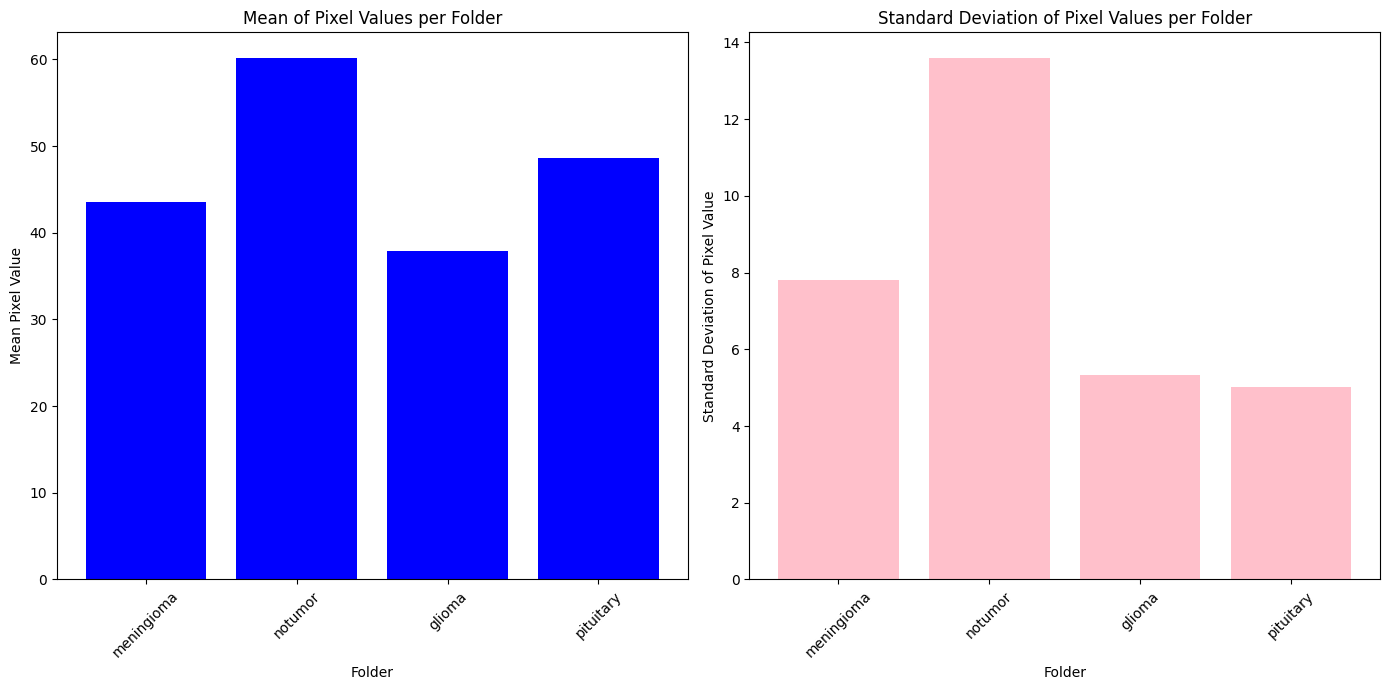

In [ ]:
# Extract folder names, means, and standard deviations
folder_names = list(folder_stats.keys())
means = [folder_stats[subdir]['mean'] for subdir in folder_names]
stds = [folder_stats[subdir]['std'] for subdir in folder_names]
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot means
ax[0].bar(folder_names, means, color='blue')
ax[0].set_title('Mean of Pixel Values per Folder')
ax[0].set_xlabel('Folder')
ax[0].set_ylabel('Mean Pixel Value')
ax[0].tick_params(axis='x', rotation=45)

# Plot standard deviations
ax[1].bar(folder_names, stds, color='pink')
ax[1].set_title('Standard Deviation of Pixel Values per Folder')
ax[1].set_xlabel('Folder')
ax[1].set_ylabel('Standard Deviation of Pixel Value')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

This is to calculate the mean and standard deviation of all images across all subfolders, this will accumulate the pixel values from all images, then compute the overall mean and standard deviation.

In [ ]:
# Step 3: Initialize lists to store mean and std of all images
all_means = []
all_stds = []

# Step 4: Iterate over subfolders and calculate mean and std for each image
for subdir in subfolders:
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                image_path = os.path.join(subdir_path, filename)
                mean, std = calculate_mean_std(image_path)
                all_means.append(mean)
                all_stds.append(std)

# Step 5: Calculate the overall mean and standard deviation across all images
overall_mean = np.mean(all_means)
overall_std = np.mean(all_stds)

# Display the overall mean and standard deviation
print(f"Overall Mean of pixel values: {overall_mean}")
print(f"Overall Standard Deviation of pixel values: {overall_std}")


Overall Mean of pixel values: 48.416906916486084
Overall Standard Deviation of pixel values: 40.556334356001855


Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0000.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0239.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0241.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0007.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0001.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0004.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0005.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0242.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0245.jpg
Resized image saved to: /content/drive/MyDriv

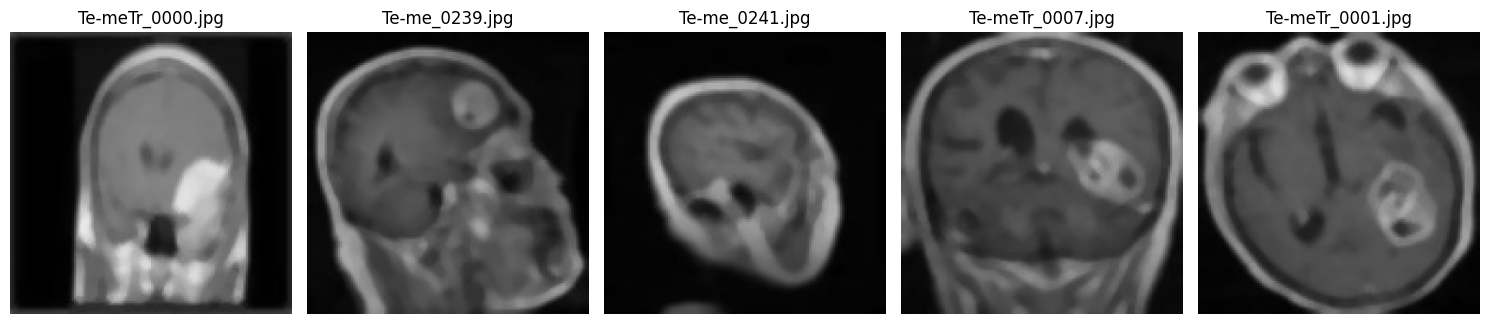

In [ ]:
output_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'
# Resizing images
def resize_image(image, new_width=None, new_height=None, inter=cv2.INTER_AREA):
    (h, w) = image.shape[:2]
    if new_width is None and new_height is None:
        return image

    if new_width is None:
        r = new_height / float(h)
        dim = (int(w * r), new_height)
    else:
        r = new_width / float(w)
        dim = (new_width, int(h * r))

    resized = cv2.resize(image, dim, interpolation=inter)
    return resized

def resize_images_in_folder(image_dir, output_dir, new_width=None, new_height=None):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    resized_images = []

    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, image_dir)
                output_path = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_path):
                    os.makedirs(output_path)

                image = cv2.imread(input_path)
                if image is None:
                    continue

                resized_image = resize_image(image, new_width, new_height)
                cv2.imwrite(os.path.join(output_path, file), resized_image)
                print(f"Resized image saved to: {os.path.join(output_path, file)}")

                # Collect the resized images and their paths for visualization
                resized_images.append((file, resized_image))

    return resized_images

def visualize_images(images, indices, figsize=(15, 10)):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=figsize)

    for i, idx in enumerate(indices):
        filename, image = images[idx]
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(filename)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

new_width = 300
new_height = 300

resized_images = resize_images_in_folder(image_dir, output_dir, new_width, new_height)

# Specify indices of the images you want to visualize (e.g., first 5 images)
num_images_to_display = 5
indices = list(range(min(num_images_to_display, len(resized_images))))

visualize_images(resized_images, indices)


Recalculating the mean and standard deviation after resizing ensures accurate statistics for resized images, which is crucial for consistent and effective preprocessing in image analysis and machine learning tasks. This process helps maintain uniformity across the dataset, enabling better model performance and more reliable analysis.

In [ ]:
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Step 2: Function to calculate mean and standard deviation for an image
def calculate_mean_std(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    return np.mean(img), np.std(img)

# Step 3: Initialize dictionary to store mean and std for each folder
folder_stats = {}

# Step 4: Iterate over subfolders and calculate mean and std for each image
for subdir in subfolders:
    subdir_path = os.path.join(output_dir, subdir)
    if os.path.isdir(subdir_path):
        means = []
        stds = []
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                image_path = os.path.join(subdir_path, filename)
                mean, std = calculate_mean_std(image_path)
                means.append(mean)
                stds.append(std)
        folder_stats[subdir] = {
            "mean": np.mean(means),
            "std": np.std(stds)
        }

# Step 5: Display the mean and standard deviation for each folder
for subdir, stats in folder_stats.items():
    print(f"Folder: {subdir}")
    print(f"  Mean of pixel values: {stats['mean']}")
    print(f"  Standard deviation of pixel values: {stats['std']}\n")

Folder: meningioma
  Mean of pixel values: 52.30702702306329
  Standard deviation of pixel values: 13.13776245158685

Folder: notumor
  Mean of pixel values: 58.908483002279965
  Standard deviation of pixel values: 15.67801571152503

Folder: glioma
  Mean of pixel values: 33.8598509339351
  Standard deviation of pixel values: 5.242811176557749

Folder: pituitary
  Mean of pixel values: 47.407550481481486
  Standard deviation of pixel values: 5.820706367623745



Morphogical Operations




This script is designed to enhance image quality by applying noise reduction techniques, specifically Gaussian blur and Median filtering, to each image in a given directory. Gaussian blur smooths the image to reduce noise and detail, while the Median filter further removes noise, particularly effective against salt-and-pepper noise. To optimize performance, the script employs parallel processing through Python's multiprocessing library, enabling it to handle multiple images concurrently and significantly speed up the overall processing time. The script systematically traverses the specified directory and its subdirectories, identifying all image files with common extensions (e.g., .jpg, .png, .tif) and applying the noise reduction techniques to each. The processed images are then saved to a specified output directory, maintaining the original directory structure. This approach is especially beneficial for handling large datasets where processing efficiency is crucial.

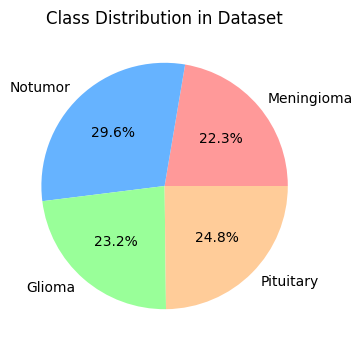

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
class_names = ['Meningioma', 'Notumor', 'Glioma', 'Pituitary']
class_counts = [153, 203, 159, 170]

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Class Distribution in Dataset')
plt.show()


In [ ]:
from multiprocessing import Pool

# Define noise reduction parameters
gaussian_kernel_size = (5, 5)
median_ksize = 5

# Function to apply noise reduction techniques
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        return

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, gaussian_kernel_size, 0)

    # Apply Median filter
    median_filtered_image = cv2.medianBlur(blurred_image, median_ksize)

    # Create output path
    relative_path = os.path.relpath(image_path, image_dir)
    output_path = os.path.join(output_dir, relative_path)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the filtered image
    cv2.imwrite(output_path, median_filtered_image)

# Function to process all images in a directory
def process_directory(image_dir, output_dir):
    # Get a list of all image files
    image_files = [os.path.join(root, file)
                   for root, dirs, files in os.walk(image_dir)
                   for file in files
                   if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff'))]

    # Use multiprocessing to process images in parallel
    with Pool() as pool:
        pool.map(process_image, image_files)


process_directory(image_dir, output_dir)


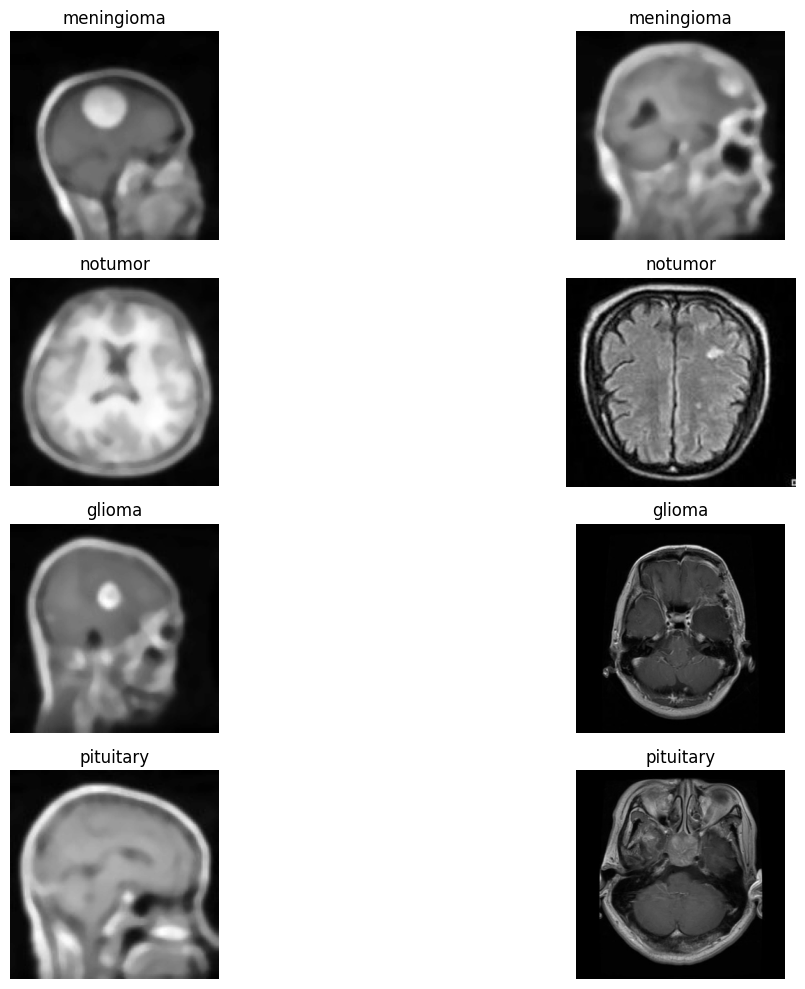

In [ ]:
# Function to get image file paths grouped by folder name
def get_image_files_by_folder(directory):
    folder_images = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')):
                # Get the folder name
                folder_name = os.path.basename(root)
                if folder_name not in folder_images:
                    folder_images[folder_name] = []
                # Append the file path to the corresponding folder
                folder_images[folder_name].append(os.path.join(root, file))

    return folder_images

# Import the random module
import random

# Function to display a set of images from each folder
def display_images_by_folder(folder_images, num_images_per_folder=5):
    plt.figure(figsize=(15, 10))

    # Counter for subplot positions
    subplot_index = 1

    for folder_name, image_files in folder_images.items():
        # Randomly select a subset of images from the folder
        selected_files = random.sample(image_files, min(num_images_per_folder, len(image_files)))

        for file_path in selected_files:
            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Display the image
            plt.subplot(len(folder_images), num_images_per_folder, subplot_index)
            plt.imshow(image, cmap='gray')
            plt.title(folder_name)
            plt.axis('off')
            subplot_index += 1

    plt.tight_layout()
    plt.show()

# Get image files grouped by folder
folder_images = get_image_files_by_folder(output_dir)

# Display images from each folder
display_images_by_folder(folder_images, num_images_per_folder=2)

This script is designed for loading images from a structured folder, extracting Histogram of Oriented Gradients (HOG) features from these images, encoding the labels, splitting the data into training and testing sets, standardizing the features, and defining a parameter grid for hyperparameter tuning of a Support Vector Machine (SVM) model. Here’s a detailed breakdown of the script

In [ ]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        subfolder = os.path.join(folder_path, label)
        if os.path.isdir(subfolder):
            for filename in os.listdir(subfolder):
                img_path = os.path.join(subfolder, filename)
                img = imread(img_path, as_gray=True) # Load as grayscale
                # Resize images to a consistent size
                img = resize(img, (128, 128)) # Example size, adjust as needed
                # Extract HOG features and flatten them
                features = hog(img, visualize=False)
                images.append(features)
                labels.append(label)
    return np.array(images), np.array(labels)

# Define your dataset path
dataset_path = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'kernel': ['linear','rbf', 'poly'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto']  # For RBF and Polynomial kernels
}

This script efficiently prepares image data for classification using HOG feature extraction. It loads images from a folder structure, extracts features, encodes labels, and splits the data into training and testing sets. The features are standardized, and a parameter grid is defined for SVM hyperparameter tuning. This setup is essential for training a robust image classification model with optimal hyperparameters.

This script segment completes the machine learning pipeline by:

Initializing and Tuning: An SVM classifier is initialized, and grid search is employed for hyperparameter tuning. This ensures that the optimal parameters for the model are found, enhancing its performance.

Training and Predicting: The model is trained using the training data, and predictions are made on the test data. This step verifies how well the model generalizes to unseen data.

Evaluating: The model's performance is evaluated using a confusion matrix and a classification report. These metrics provide detailed insights into the model's accuracy, precision, recall, and f1-score for each class, highlighting its performance in different areas.

Visualization: The confusion matrix is plotted, offering a visual representation of the model's performance. This helps in quickly identifying where the model is performing well and where it might be making errors.

This comprehensive approach ensures that the model is not only optimized for performance but also thoroughly evaluated to understand its strengths and weaknesses. By doing so, it provides a clear picture of the model's effectiveness and areas for potential improvement.

**SUPPORT VECTOR MACHINE**


Model Initialization: initialization of an SVM model using SVM classifier

Hyperparameter Tuning: use Grid Search with Cross-Validation to find the best hyperparameters.

Model Training: The best model is trained on the training data.

Model Evaluation: The model's performance is evaluated using the test data, with metrics like accuracy, confusion matrix, and a classification report to understand how well the model performs on each class.

Visualization: Finally, the confusion matrix is visualized to provide insight into where the model might be making errors

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


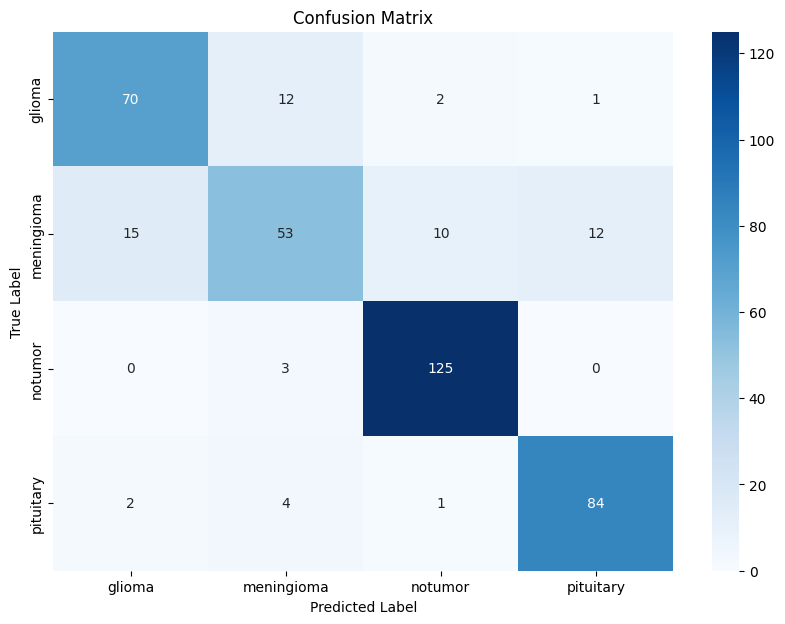

Classification Report with zero_division=0:
              precision    recall  f1-score   support

      glioma       0.80      0.82      0.81        85
  meningioma       0.74      0.59      0.65        90
     notumor       0.91      0.98      0.94       128
   pituitary       0.87      0.92      0.89        91

    accuracy                           0.84       394
   macro avg       0.83      0.83      0.83       394
weighted avg       0.84      0.84      0.84       394



In [ ]:
# Initialize the SVM classifier with probability=True
svc = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions
y_pred = best_model.predict(X_test)

# Assuming 'label_encoder' is the LabelEncoder used earlier
label_names = label_encoder.classes_

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with zero_division set to 0
print("Classification Report with zero_division=0:")
print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0))

Additional Metrics:
True Positive Rate (Recall): [0.8        0.55555556 0.9765625  0.94505495]
True Negative Rate (Specificity): [0.93527508 0.93421053 0.95488722 0.95709571]
F1 Score: [0.78612717 0.625      0.94339623 0.90526316]


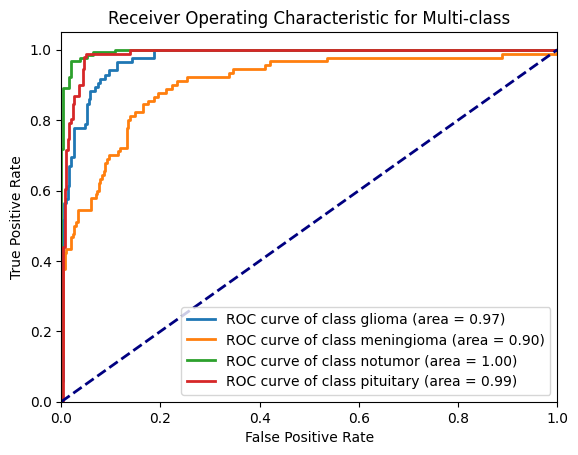

In [ ]:
# Calculate and print additional metrics
from sklearn.preprocessing import LabelBinarizer # Import the LabelBinarizer class
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc here

# Calculate and print additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # Negative predictive value
    NPV = TN / (TN + FN)
    # Fall out or false positive rate
    FPR = FP / (FP + TN)
    # False negative rate
    FNR = FN / (TP + FN)
    # False discovery rate
    FDR = FP / (TP + FP)
    # F1 score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_names) == 2:  # Binary classification
    y_score = best_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    y_score = best_model.predict_proba(X_test)
    plt.figure()
    for i in range(len(label_names)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

**RANDOM FOREST ALGORITHM**

In [ ]:
# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Random Forest Classification Report:
              precision    recall  f1-score   support

      glioma       0.80      0.81      0.81        85
  meningioma       0.65      0.50      0.57        90
     notumor       0.88      0.97      0.92       128
   pituitary       0.84      0.90      0.87        91

    accuracy                           0.81       394
   macro avg       0.79      0.80      0.79       394
weighted avg       0.80      0.81      0.80       394



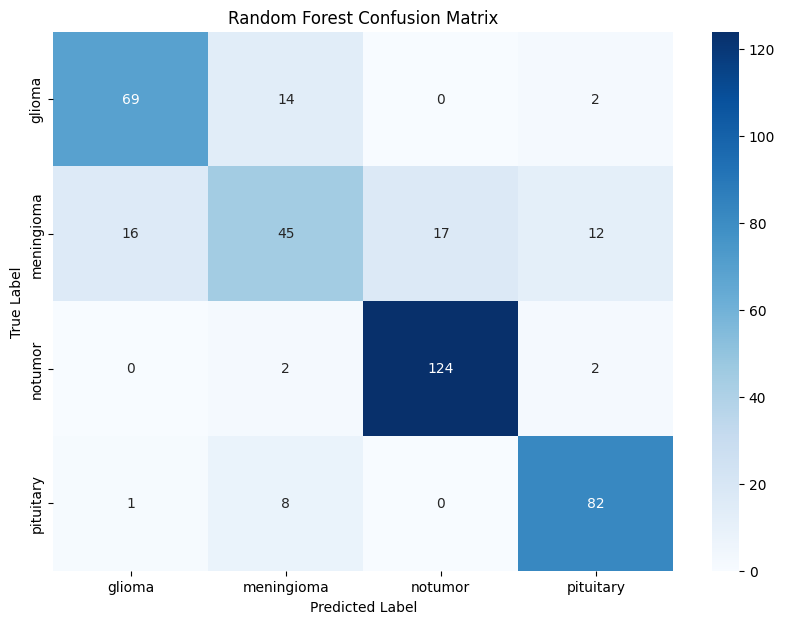

Additional Metrics:
True Positive Rate (Recall): [0.81176471 0.5        0.96875    0.9010989 ]
True Negative Rate (Specificity): [0.94498382 0.92105263 0.93609023 0.94719472]
F1 Score: [0.80701754 0.56603774 0.92193309 0.86772487]


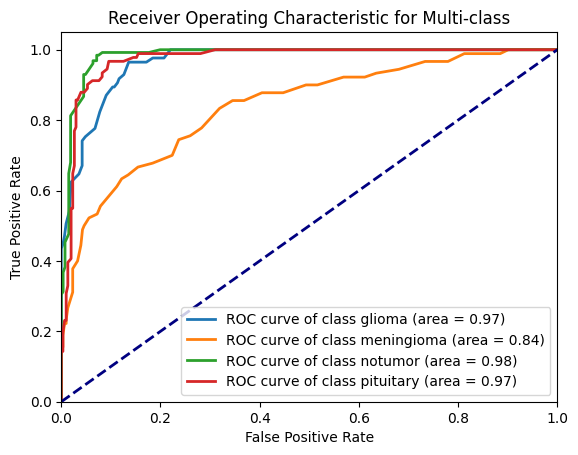

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Get the unique class labels
label_names = label_encoder.classes_

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_names, zero_division=0))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate Additional Metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    TNR = TN / (TN + FP)  # True Negative Rate (Specificity)
    PPV = TP / (TP + FP)  # Precision
    F1 = 2 * (PPV * TPR) / (PPV + TPR)  # F1 Score

    return TPR, TNR, F1

# Calculate the metrics for the Random Forest model
TPR, TNR, F1 = calculate_metrics(cm_rf)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_names) == 2:  # Binary classification
    y_score = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    y_score = rf_classifier.predict_proba(X_test)
    plt.figure()
    for i in range(len(label_names)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()


**KNN ALGORITHM**

KNN Classification Report:
              precision    recall  f1-score   support

      glioma       0.68      0.85      0.76        62
  meningioma       0.75      0.34      0.47        62
     notumor       0.85      0.92      0.88        77
   pituitary       0.79      0.94      0.86        62

    accuracy                           0.77       263
   macro avg       0.77      0.76      0.74       263
weighted avg       0.77      0.77      0.75       263



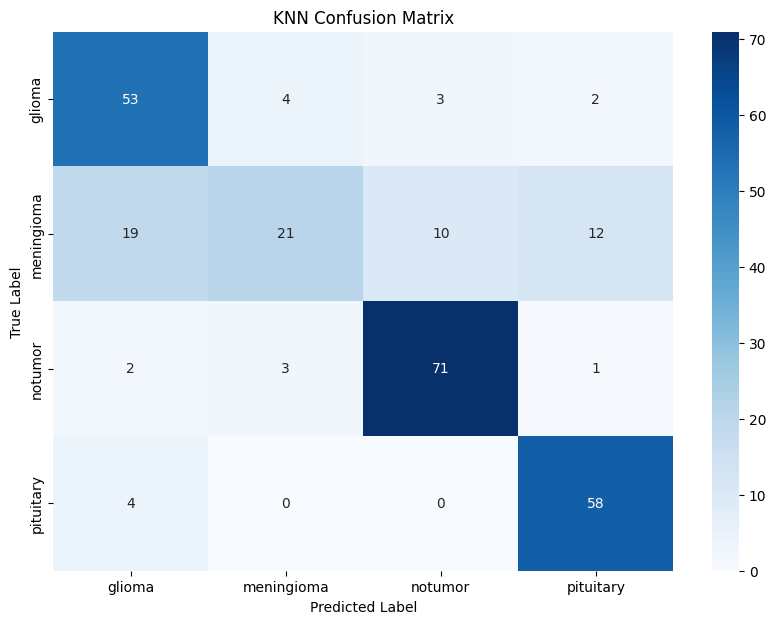

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Define your dataset path
dataset_path = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) # Assign the result to y_encoded
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)
y_prob_knn = knn_classifier.predict_proba(X_test)

# Evaluate the KNN model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, zero_division=0))

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

Additional Metrics:
True Positive Rate (Recall): [0.85483871 0.33870968 0.92207792 0.93548387]
True Negative Rate (Specificity): [0.87562189 0.96517413 0.93010753 0.92537313]
F1 Score: [0.75714286 0.46666667 0.88198758 0.85925926]


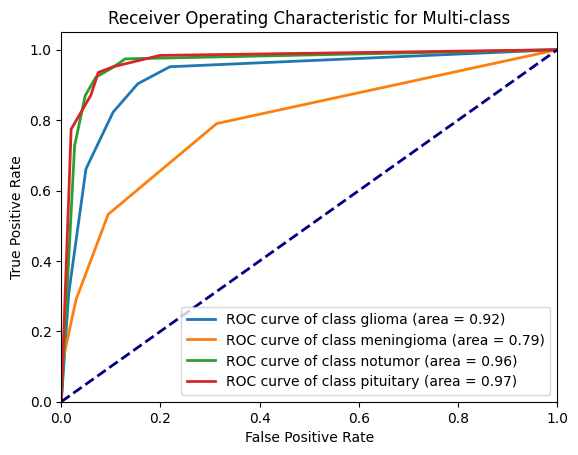

In [74]:
# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    FDR = FP / (TP + FP)
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm_knn)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_encoder.classes_) == 2:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob_knn[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    FDR = FP / (TP + FP)
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm_knn)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Recalculate y_prob_knn using X_test to ensure consistency in number of samples
y_prob_knn = knn_classifier.predict_proba(X_test) # Recalculate probabilities using the original test set

if len(label_encoder.classes_) == 2:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob_knn[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

**SAVE MODEL**

In [77]:
import joblib

# Save the trained KNN model
knn_filename = 'knn_model.pkl'
joblib.dump(knn_classifier, knn_filename)
print(f"Model saved as {knn_filename}")

# Save the trained SVM model
svm_filename = 'svm_model.pkl'
joblib.dump(best_model, svm_filename)
print(f"Model saved as {svm_filename}")

# Save the trained Random Forest model
rf_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, rf_filename)
print(f"Model saved as {rf_filename}")

Model saved as knn_model.pkl
Model saved as svm_model.pkl
Model saved as random_forest_model.pkl


**PRECOSSING DATASET FOR MODEL INTEGRATION**

Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0010.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0011.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0012.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0013.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0014.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0015.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0016.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0017.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0018.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJ

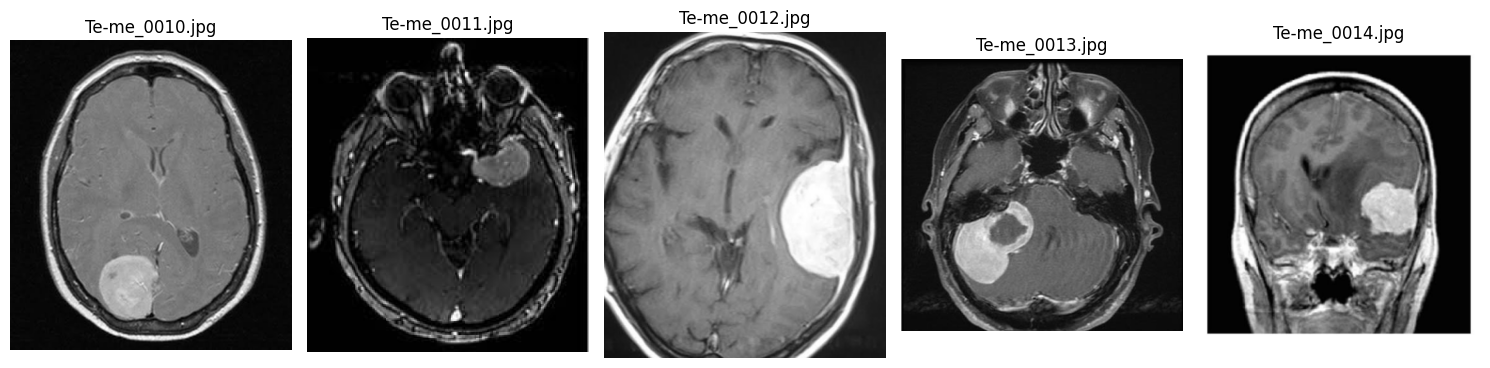

In [ ]:
input_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT'
# Resizing images
def resize_image(image, new_width=None, new_height=None, inter=cv2.INTER_AREA):
    (h, w) = image.shape[:2]
    if new_width is None and new_height is None:
        return image

    if new_width is None:
        r = new_height / float(h)
        dim = (int(w * r), new_height)
    else:
        r = new_width / float(w)
        dim = (new_width, int(h * r))

    resized = cv2.resize(image, dim, interpolation=inter)
    return resized

def resize_images_in_folder(test_dir, input_dir, new_width=None, new_height=None):
    if not os.path.exists(input_dir):
        os.makedirs(input_dir)

    resized_images = []

    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, test_dir)
                output_path = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_path):
                    os.makedirs(output_path)

                image = cv2.imread(input_path)
                if image is None:
                    continue

                resized_image = resize_image(image, new_width, new_height)
                cv2.imwrite(os.path.join(output_path, file), resized_image)
                print(f"Resized image saved to: {os.path.join(output_path, file)}")

                # Collect the resized images and their paths for visualization
                resized_images.append((file, resized_image))

    return resized_images

def visualize_images(images, indices, figsize=(15, 10)):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=figsize)

    for i, idx in enumerate(indices):
        filename, image = images[idx]
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(filename)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

new_width = 300
new_height = 300

resized_images = resize_images_in_folder(test_dir, input_dir, new_width, new_height)

# Specify indices of the images you want to visualize (e.g., first 5 images)
num_images_to_display = 5
indices = list(range(min(num_images_to_display, len(resized_images))))

visualize_images(resized_images, indices)


**VISUALIZATION OF DATASET**

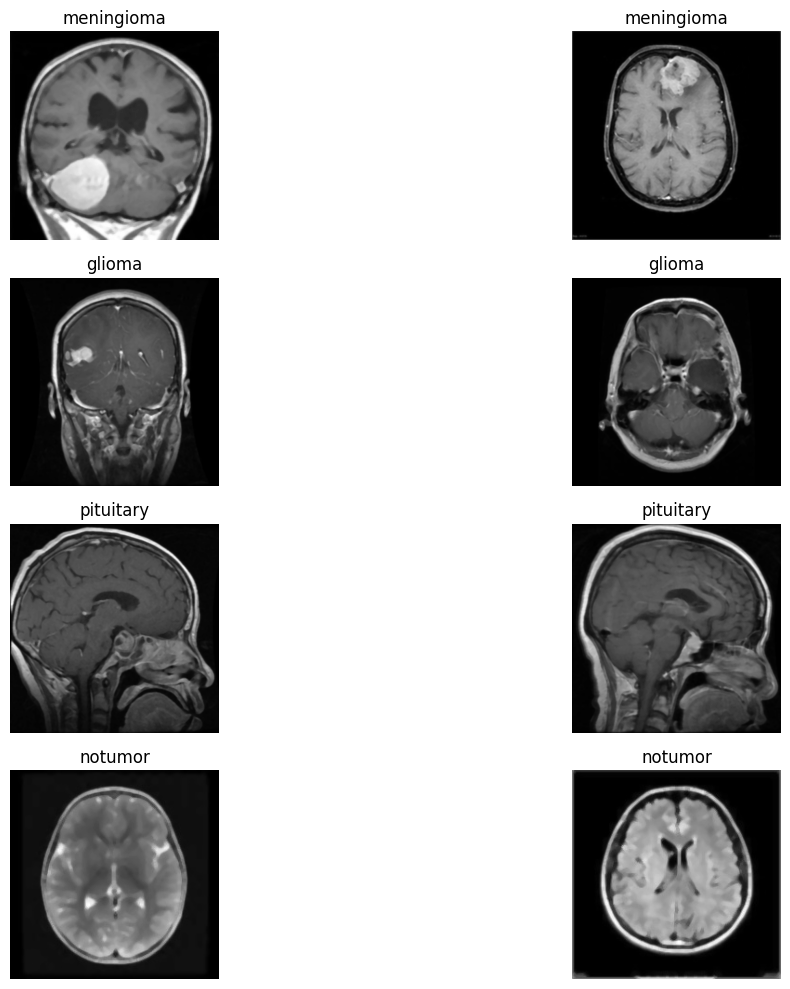

In [ ]:
# Function to get image file paths grouped by folder name
def get_image_files_by_folder(directory):
    folder_images = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')):
                # Get the folder name
                folder_name = os.path.basename(root)
                if folder_name not in folder_images:
                    folder_images[folder_name] = []
                # Append the file path to the corresponding folder
                folder_images[folder_name].append(os.path.join(root, file))

    return folder_images

# Import the random module
import random

# Function to display a set of images from each folder
def display_images_by_folder(folder_images, num_images_per_folder=5):
    plt.figure(figsize=(15, 10))

    # Counter for subplot positions
    subplot_index = 1

    for folder_name, image_files in folder_images.items():
        # Randomly select a subset of images from the folder
        selected_files = random.sample(image_files, min(num_images_per_folder, len(image_files)))

        for file_path in selected_files:
            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Display the image
            plt.subplot(len(folder_images), num_images_per_folder, subplot_index)
            plt.imshow(image, cmap='gray')
            plt.title(folder_name)
            plt.axis('off')
            subplot_index += 1

    plt.tight_layout()
    plt.show()

# Get image files grouped by folder
folder_images = get_image_files_by_folder(input_dir)

# Display images from each folder
display_images_by_folder(folder_images, num_images_per_folder=2)

**DATA PIPELINING**

In [ ]:
import os
from multiprocessing import Pool

# Define noise reduction parameters
gaussian_kernel_size = (5, 5)
median_ksize = 5

# Function to apply noise reduction techniques
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        return

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, gaussian_kernel_size, 0)

    # Apply Median filter
    median_filtered_image = cv2.medianBlur(blurred_image, median_ksize)

    # Create output path
    relative_path = os.path.relpath(image_path, test_dir)
    output_path = os.path.join(input_dir, relative_path)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the filtered image
    cv2.imwrite(output_path, median_filtered_image)

# Function to process all images in a directory
def process_directory(test_dir, input_dir):
    # Get a list of all image files
    image_files = [os.path.join(root, file)
                   for root, dirs, files in os.walk(test_dir)
                   for file in files
                   if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff'))]

    # Use multiprocessing to process images in parallel
    with Pool() as pool:
        pool.map(process_image, image_files)


process_directory(test_dir, input_dir)


In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from skimage import io, color
from skimage.transform import resize
import os

def load_images_from_folder(folder_path):
    if not os.path.exists(folder_path):
        raise ValueError(f"Folder does not exist: {folder_path}")

    images = []
    labels = []

    # List subdirectories in the main directory
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    print(f"Subdirectories in folder {folder_path}: {subdirectories}")

    if not subdirectories:
        raise ValueError(f"No subdirectories found in folder: {folder_path}")

    # Process each subdirectory
    for subdirectory in subdirectories:
        subfolder_path = os.path.join(folder_path, subdirectory)

        # List files in the subdirectory
        file_list = os.listdir(subfolder_path)
        print(f"Files in subfolder {subfolder_path}: {file_list}")

        if not file_list:
            print(f"No files found in subfolder: {subfolder_path}")
            continue

        # Process each file in the subdirectory
        for filename in file_list:
            img_path = os.path.join(subfolder_path, filename)
            if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                try:
                    img = io.imread(img_path)

                    # Convert grayscale images to RGB
                    if img.ndim == 2:  # Grayscale image
                        img = np.stack([img] * 3, axis=-1)

                    # Resize images to a consistent size (e.g., 256x256)
                    img = resize(img, (256, 256), mode='reflect', anti_aliasing=True)

                    images.append(img)
                    labels.append(subdirectory)  # Use subdirectory name as label
                except Exception as e:
                    print(f"Error loading image {filename}: {e}")
            else:
                print(f"Skipped file (not an image or invalid extension): {filename}")

    if len(images) == 0:
        raise ValueError(f"No valid images found in folder: {folder_path}")

    return np.array(images), np.array(labels)

def preprocess_images(folder_path):
    images, labels = load_images_from_folder(folder_path)

    # Convert RGB images to grayscale for HOG
    images_gray = np.array([color.rgb2gray(img) for img in images])

    # Check if images have the same shape
    img_shapes = [img.shape for img in images_gray]
    print(f"Image shapes: {img_shapes}")  # Debug: Print shapes of images
    if len(set(img_shapes)) > 1:
        raise ValueError("Images have different sizes. Please resize them to a uniform shape.")

    # Extract HOG features
    features = np.array([hog(img, visualize=False) for img in images_gray])

    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, labels

# Define paths
image_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT'
test_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT'

# Preprocess training and test data
X_train, y_train = preprocess_images(image_dir)
X_test, y_test = preprocess_images(test_dir)


Subdirectories in folder /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT: ['meningioma', 'glioma', 'pituitary', 'notumor']
Files in subfolder /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma: ['Te-me_0012.jpg', 'Te-me_0010.jpg', 'Te-me_0089.jpg', 'Te-me_0090.jpg', 'Te-me_0011.jpg', 'Te-me_0091.jpg', 'Te-me_0013.jpg', 'Te-me_0092.jpg', 'Te-me_0094.jpg', 'Te-me_0016.jpg', 'Te-me_0015.jpg', 'Te-me_0095.jpg', 'Te-me_0093.jpg', 'Te-me_0014.jpg', 'Te-me_0096.jpg', 'Te-me_0098.jpg', 'Te-me_0097.jpg', 'Te-me_0017.jpg', 'Te-me_0018.jpg', 'Te-me_0100.jpg', 'Te-me_0099.jpg', 'Te-me_0102.jpg', 'Te-me_0019.jpg', 'Te-me_0020.jpg', 'Te-me_0101.jpg', 'Te-me_0104.jpg', 'Te-me_0021.jpg', 'Te-me_0022.jpg', 'Te-me_0103.jpg', 'Te-me_0023.jpg', 'Te-me_0107.jpg', 'Te-me_0025.jpg', 'Te-me_0026.jpg', 'Te-me_0105.jpg', 'Te-me_0024.jpg', 'Te-me_0028.jpg', 'Te-me_0106.jpg', 'Te-me_0027.jpg', 'Te-me_0108.jpg', 'Te-me_0111.jpg', 'Te-me_0110.jpg', 'Te-me_0029.jpg', 'Te-me_0109.jpg', 'Te-me_0030

**INTEGRATION OF MODELS**

In [78]:
import joblib

# Load the models
knn_model = joblib.load('knn_model.pkl')
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Assuming svm_model, knn_model, and rf_model are your trained models

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[('svm', svm_model), ('knn', knn_model), ('rf', rf_model)],
    voting='hard'  # 'hard' for majority voting
)

# Train the voting classifier on the training data (if not already done)
voting_clf_hard.fit(X_train, y_train)

# Make predictions on the test data
y_pred_voting_hard = voting_clf_hard.predict(X_test)

# Calculate accuracy
accuracy_voting_hard = accuracy_score(y_test, y_pred_voting_hard)
print(f"Voting Classifier (Hard Voting) Accuracy: {accuracy_voting_hard}")

# If you want to use weighted voting
voting_clf_weighted = VotingClassifier(
    estimators=[('svm', svm_model), ('knn', knn_model), ('rf', rf_model)],
    voting='soft',  # 'soft' for averaging probabilities
    weights=[2, 1, 3]  # Assign weights to models based on their performance
)

# Train and predict
voting_clf_weighted.fit(X_train, y_train)
y_pred_voting_weighted = voting_clf_weighted.predict(X_test)

# Calculate accuracy
accuracy_voting_weighted = accuracy_score(y_test, y_pred_voting_weighted)
print(f"Voting Classifier (Weighted Voting) Accuracy: {accuracy_voting_weighted}")


Voting Classifier (Hard Voting) Accuracy: 0.8098859315589354
Voting Classifier (Weighted Voting) Accuracy: 0.8326996197718631
